### Fonte [Kaggle](https://www.kaggle.com/datasets) 🔗

##### Projeto: Amazon Top 50 Bestselling Books 2009 - 2019
##### Objetivo: Análise exploratória de dados.
##### Fonte do conjunto: [Amazon Top 50 Bestselling Book](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019/data)

##### Objetivo: Responder as questões abaixo

- Qual gênero tem mais livros nesta categoria?
- Qual é a classificação média de cada gênero?
- Qual é a popularidade de cada gênero e sua relação com o tempo?
- Em que ano houve mais livros vendidos nesta categoria?
- Que efeito o tempo teve no preço dos livros ao longo dos anos?
- Preço dos livros de cada gênero ao longo dos anos.
- Como têm sido as avaliações dos clientes ao longo dos anos?
- Quais gêneros têm as classificações mais altas e mais baixas?
- Qual autor é mais popular e quais ganharam mais nesta categoria?
- Quem é o autor mais popular de cada gênero?
- Quais livros ganharam mais dinheiro em cada gênero?
- O dinheiro que gera livros em geral.
- Qual é a relação da venda com as classificações?

Importando as bibliotecas 📚

In [43]:
import pandas as pd
import seaborn as snsclea
import matplotlib.pyplot as plt
import numpy as np

Carregando o conjunto de dados 🎲

In [44]:
df_bestsellers = pd.read_csv('./dataset/bestsellers with categories.csv', encoding = 'latin-1', dtype={'Price': float})

In [45]:
# Visualizando rapidamente uma amostra do conjunto

df_bestsellers.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction


In [46]:
# Utilizando o encadeamento abaixo podemos verificar que NÃO EXISTEM REGISTROS VAZIOS no nosso conjunto, poderiamos
# também ter utilizado o método .info() para obter o mesmo resultado.

df_bestsellers.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [47]:
# Verificando os tipos de dados notei que a coluna "Price" possuia o tipo de dados INT, preferi altera-lá para FLOAT no carregamento da base. 
# Mesmo que só guardemos valores inteiros nessa coluna o tipo FLOAT presenta melhoror esse tipo informação monetaria.

df_bestsellers.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price          float64
Year             int64
Genre           object
dtype: object

In [50]:
df_bestsellers['Genre']

0      Non Fiction
1          Fiction
2      Non Fiction
3          Fiction
4      Non Fiction
          ...     
545        Fiction
546    Non Fiction
547    Non Fiction
548    Non Fiction
549    Non Fiction
Name: Genre, Length: 550, dtype: object

📌 - Olhando o gráfico podemos constatar que o gênero de 'Non-Fiction'(Não é ficção) com 56.4% de repesentatividade é gênero mais consumido entre os Bestsellers de 2009 a 2019.

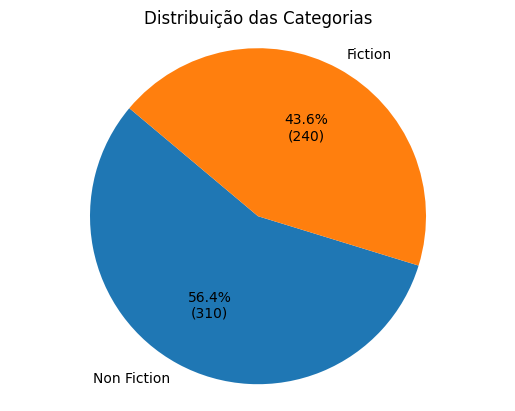

In [82]:
sizes = df_bestsellers['Genre'].value_counts()
labels = sizes.index

def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
plt.title('Distribuição das Categorias')
plt.axis('equal')
plt.show()


